# Charge mutations

## Format the data appropriately for arsenic

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [15]:
title_pairs = [["D35A"], ["D39A"], ["E76A"], ["E80A"], ["K27A"], ["R59A"], ["R83Q"], ["R87A"]]
dir_num = 18
subdirs = [11, 5, 6, 7, 13, 1, 3, 4]

# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, subdir in enumerate(subdirs):
    print(f"loading {i}")
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
        binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
#             binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:3], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
#     to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

loading 0
loading 1
loading 2
loading 3
loading 4
loading 5
loading 6
loading 7


In [16]:
to_plot

[['D35', 'A35', 3.399997396914247, 0.1685567974420465, 0.6387465740494926],
 ['D39', 'A39', 15.504527818058099, 0.7191886720822218, 2.1851147361696626],
 ['E76', 'A76', 2.0955628363178875, 0.12031976574274597, 0.23105962959578763],
 ['E80', 'A80', -0.333984141137505, 0.12165098993867397, 0.22949598842257596],
 ['K27', 'A27', 7.589077852959192, 0.3966033215248302, 0.9873190027466157],
 ['R59', 'A59', 5.070564178998185, 0.30087710144909185, 0.8323746830430903],
 ['R83', 'Q83', 17.049466264654637, 0.48984788084255376, 0.6425145903705669],
 ['R87', 'A87', 1.6985340566738805, 0.20195695186106496, 0.6117803032742295]]

In [17]:
d = {'WT': 19.0, 'A27': 13.6, 'A59': 13.8, 'Q83': 13.6, 'A87': 13.5, 'A35': 14.5, 'A39': 11.3, 'A76': 17.65, 'A80': 18.5}

In [18]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['K27', d['WT']*-1, 0]) # take the negative of everything bc i think hannah subtracts differently
        experiment.append(['R59', d['WT']*-1, 0])
        experiment.append(['R83', d['WT']*-1, 0])
        experiment.append(['R87', d['WT']*-1, 0])
        experiment.append(['D35', d['WT']*-1, 0])
        experiment.append(['D39', d['WT']*-1, 0])
        experiment.append(['E76', d['WT']*-1, 0])
        experiment.append(['E80', d['WT']*-1, 0])
    else:
        experiment.append([k, d[k]*-1, 0])

In [19]:
experiment

[['K27', -19.0, 0],
 ['R59', -19.0, 0],
 ['R83', -19.0, 0],
 ['R87', -19.0, 0],
 ['D35', -19.0, 0],
 ['D39', -19.0, 0],
 ['E76', -19.0, 0],
 ['E80', -19.0, 0],
 ['A27', -13.6, 0],
 ['A59', -13.8, 0],
 ['Q83', -13.6, 0],
 ['A87', -13.5, 0],
 ['A35', -14.5, 0],
 ['A39', -11.3, 0],
 ['A76', -17.65, 0],
 ['A80', -18.5, 0]]

In [20]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_charge_optimized.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


In [21]:
experiment + to_plot

[['K27', -19.0, 0],
 ['R59', -19.0, 0],
 ['R83', -19.0, 0],
 ['R87', -19.0, 0],
 ['D35', -19.0, 0],
 ['D39', -19.0, 0],
 ['E76', -19.0, 0],
 ['E80', -19.0, 0],
 ['A27', -13.6, 0],
 ['A59', -13.8, 0],
 ['Q83', -13.6, 0],
 ['A87', -13.5, 0],
 ['A35', -14.5, 0],
 ['A39', -11.3, 0],
 ['A76', -17.65, 0],
 ['A80', -18.5, 0],
 ['D35', 'A35', 3.399997396914247, 0.1685567974420465, 0.6387465740494926],
 ['D39', 'A39', 15.504527818058099, 0.7191886720822218, 2.1851147361696626],
 ['E76', 'A76', 2.0955628363178875, 0.12031976574274597, 0.23105962959578763],
 ['E80', 'A80', -0.333984141137505, 0.12165098993867397, 0.22949598842257596],
 ['K27', 'A27', 7.589077852959192, 0.3966033215248302, 0.9873190027466157],
 ['R59', 'A59', 5.070564178998185, 0.30087710144909185, 0.8323746830430903],
 ['R83', 'Q83', 17.049466264654637, 0.48984788084255376, 0.6425145903705669],
 ['R87', 'A87', 1.6985340566738805, 0.20195695186106496, 0.6117803032742295]]

## Make arsenic plot

In [23]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [24]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/18/arsenic_input_charge_optimized.csv')

Graph is not connected enough to compute absolute values


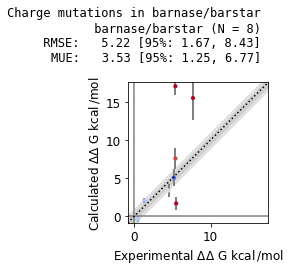

In [25]:
plotting.plot_DDGs(fe.graph,target_name='barnase/barstar', title='Charge mutations in barnase/barstar', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_charge_optimized.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version